In [8]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import scipy.stats as st
import joypy
from matplotlib import cm
import ast
import matplotlib as mpl
from statannot import add_stat_annotation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from scipy.stats import fisher_exact
mpl.rcParams['pdf.fonttype'] = 42
centimeter = 1/2.54

In [9]:
def meanCI(a, conf=0.95):
    mean, sem, m = np.mean(a), st.sem(a), st.t.ppf((1+conf)/2., len(a)-1)
    return mean, sem*1.986

color_palette = {
    'White' : '#ffffb3',
    'Asian' : '#fb8072',
    'M. Eastern' : '#80b1d3',
    'Latinx' : '#fdb462',
    'Indian' : '#b3de69',
    'Black' : '#fccde5',
    'male' : '#bebada',
    'female' : '#8dd3c7'
}

ethnicity_map = {
    6: 'White',
    5: 'Asian',
    4: 'M. Eastern',
    3: 'Latinx',
    2: 'Indian',
    1: 'Asian',
    0: 'Black'
}

age_map =  {
    0: '(0-9)',
    1: '(10-19)',
    2: '(20-39)',
    3: '(40-59)',
    4: '(> 60)'
}

gender_map = {
    0: 'male',
    1: 'female'
}

In [10]:
def fix_image_path(x):
    x = x.split('/')[-1]
    x = '_'.join(x.split('_')[:2]) + '.jpg'
    return x

emotions = pd.read_csv('../../data/Ads/ADS_emotion.csv')

emotion_map = {
    0: 'Neutral',
    1: 'Happy' ,
    2: 'Sad' ,
    3: 'Surprise' ,
    4: 'Fear' ,
    5: 'Disgust' ,
    6: 'Anger' 
}


emotions['emotion'] = emotions['y_pred'].apply(lambda x: emotion_map[x])
emotions['image_adjusted'] = emotions['image'].apply(lambda x: fix_image_path(x))
emotions['person_number'] = emotions['image'].apply(lambda x: x.split('/')[-1].split('_')[2][0])
print(len(emotions))
emotions.head()

14814


,image,y_pred,emotion,image_adjusted,person_number
0,/workspace/affectnet/test/0/0_10010_0.jpg,1,Happy,0_10010.jpg,0
1,/workspace/affectnet/test/0/0_100370_1.jpg,6,Anger,0_100370.jpg,1
2,/workspace/affectnet/test/0/0_100460_0.jpg,0,Neutral,0_100460.jpg,0
3,/workspace/affectnet/test/0/0_100480_0.jpg,6,Anger,0_100480.jpg,0
4,/workspace/affectnet/test/0/0_10050_0.jpg,2,Sad,0_10050.jpg,0


In [11]:
representation = pd.read_csv('../../data/Ads/ADS_representation.csv')
representation['image_adjusted'] = representation['image'].apply(lambda x: fix_image_path(x))
representation['person_number'] = representation['image'].apply(lambda x: x.split('/')[-1].split('_')[2][0])
representation['race'] = representation['race'].apply(lambda x: ethnicity_map[x])
representation['age'] = representation['age'].apply(lambda x: age_map[x])
representation['gender'] = representation['gender'].apply(lambda x: gender_map[x])
print(representation.head())
len(representation)

            image    race  gender      age image_adjusted person_number
0  2_110822_1.jpg   Black    male  (20-39)   2_110822.jpg             1
1   0_84300_0.jpg   White  female  (20-39)    0_84300.jpg             0
2   8_94338_0.jpg   White  female  (20-39)    8_94338.jpg             0
3   8_49498_0.jpg   White  female  (20-39)    8_49498.jpg             0
4  0_139110_0.jpg  Indian    male  (20-39)   0_139110.jpg             0


14814

In [12]:
portrayal_all = pd.read_csv('../../data/Ads/ADS_portryal_check.csv')
portrayal_all.head()

,image,person,posture,body,female,male,dominant,center
0,0_100060.jpg,yes,male standing & male sitting,male upper body without legs & male upper body...,no females portrayed,"male portrayed casually, another attentive",neither,male
1,0_10010.jpg,yes,"female, standing &","female, upper body with legs &","positively, with a beverage",no males shown,neither,female
2,0_100100.jpg,no,NaN,NaN,NaN,NaN,neither,neither
3,0_100160.jpg,no,not applicable,not applicable,not applicable,not applicable,neither,neither
4,0_100220.jpg,no,NaN,NaN,NaN,NaN,neither,neither


In [13]:
portrayal_rep = pd.merge(portrayal_all, representation, left_on='image', right_on = 'image_adjusted')
print(len(portrayal_rep))
portrayal_rep.head()

13407


,image_x,person,posture,body,female,male,dominant,center,image_y,race,gender,age,image_adjusted,person_number
0,0_10010.jpg,yes,"female, standing &","female, upper body with legs &","positively, with a beverage",no males shown,neither,female,0_10010_0.jpg,Asian,female,(20-39),0_10010.jpg,0
1,0_100370.jpg,yes,male standing & female standing,male upper body without legs & female upper bo...,"assertive, powerful","confident, heroic",neither,male,0_100370_1.jpg,White,female,(20-39),0_100370.jpg,1
2,0_100460.jpg,yes,"female, standing pose","female, upper body without legs","stylishly, confidently",no males present,neither,female,0_100460_0.jpg,White,female,(20-39),0_100460.jpg,0
3,0_100480.jpg,yes,"male, standing &","male, upper body without legs &",no females present,"confident, focused",neither,male,0_100480_0.jpg,White,male,(20-39),0_100480.jpg,0
4,0_10050.jpg,yes,"male, standing &","male, upper body without legs &",no female(s) shown,male portrayed positively,male,male,0_10050_0.jpg,White,male,(40-59),0_10050.jpg,0


In [14]:
body = pd.read_csv('../../data/Ads/body_composition_ads.csv')
body['body'].value_counts()
body = body.loc[body['body'].isin(['full-body', 'face', 'torso'])]
body = body.replace({'full-body' : '1_Full-body', 'face' : '3_Face', 'torso' : '2_Torso'})

In [15]:
def get_emotion_race_df(emotion_representation):
    
    proportion = []
    races = []
    emotions = []
    
    for race in emotion_representation['race'].unique():
        sliced = emotion_representation[emotion_representation['race'] == race]
        props = sliced['emotion'].value_counts(normalize = True).reset_index()
        # print(props.head())
        
        # print(sliced.head())
        for i, row in props.iterrows():
            proportion.append(row['proportion'])
            races.append(race)
            emotions.append(row['emotion'])
            
    return pd.DataFrame({'race' : races, 'emotion' : emotions, 'proportion' : proportion})

def get_emotion_race_df_counts(emotion_representation):
    
    proportion = []
    races = []
    emotions = []
    
    for race in emotion_representation['race'].unique():
        sliced = emotion_representation[emotion_representation['race'] == race]
        props = sliced['emotion'].value_counts(normalize = False).reset_index()
        print(props.head())
        
        # print(sliced.head())
        for i, row in props.iterrows():
            proportion.append(row['count'])
            races.append(race)
            emotions.append(row['emotion'])
            
    return pd.DataFrame({'race' : races, 'emotion' : emotions, 'count' : proportion})


emotion_representation = pd.merge(representation, emotions, on = ['image_adjusted', 'person_number']).drop(columns = ['image_x', 'image_y'])
emotion_representation.head()

emotion_race = get_emotion_race_df(emotion_representation)
emotion_race['proportion'] = emotion_race['proportion'] * 100
emotion_race.head()

emotion_race_counts = get_emotion_race_df_counts(emotion_representation)
emotion_race_counts.head()

    emotion  count
0     Happy    401
1   Neutral    388
2     Anger    142
3       Sad     85
4  Surprise     62
    emotion  count
0     Happy   4473
1   Neutral   3997
2     Anger   1091
3       Sad    726
4  Surprise    578
    emotion  count
0     Happy    163
1   Neutral     76
2     Anger     66
3       Sad     32
4  Surprise     24
    emotion  count
0     Happy    447
1   Neutral    315
2     Anger    101
3       Sad     84
4  Surprise     83
    emotion  count
0     Happy    225
1   Neutral    140
2     Anger    134
3       Sad     55
4  Surprise     25
    emotion  count
0     Happy    406
1   Neutral    298
2       Sad     47
3     Anger     42
4  Surprise     41


,race,emotion,count
0,Black,Happy,401
1,Black,Neutral,388
2,Black,Anger,142
3,Black,Sad,85
4,Black,Surprise,62


In [16]:
portrayal_all = portrayal_all.loc[portrayal_all['person'] == 'yes']

def get_cluster(x):
    if type(x) != str:
        return ['Error']
    
    if pd.isnull(x):
        return ['Empty']
    if 'not applicable' in x or 'N/A' in x:
        return ['Not applicable']
    clusters = []
    if 'no' in x and ('found' in x or 'portrayed' in x or 'included' in x or 'depicted' in x or 'present' in x or 'shown' in x):
        return ['None found']
    
    for item in ['neutral']:
        if item in x:
            clusters.append('neutral')
    for item in ['sensual', 'attractive', 'sensually']:
        if item in x:
            clusters.append('sensual')
    for item in ['submissive', 'vunerably', 'vulnerably', 'submissively']:
        if item in x:
            clusters.append('submissive')
    for item in ['dominant', 'powerful', 'dominantly', 'powerfully']:
        if item in x:
            clusters.append('dominant')
    for item in ['distressed', 'worried', 'worriedly', 'disstress', 'distress', 'distressingly', 'overwhelmed', 'stressed']:
        if item in x:
            clusters.append('distressed/worried')
    for item in ['casual', 'casually']:
        if item in x:
            clusters.append('casual')
    for item in ['serious', 'seriously']:
        if item in x:
            clusters.append('serious')
    for item in ['confident', 'confidently']:
        if item in x:
            clusters.append('confident')
    for item in ['happy', 'happily', 'cheerful', 'cheerfully','joyous', 'joyfully', 'enthusiastic', 'enthusiastically']:
        if item in x:
            clusters.append('happy')
    for item in ['sad', 'sadly']:
        if item in x:
            clusters.append('sad')
    for item in ['angry', 'angrily']:
        if item in x:
            clusters.append('angry')
    for item in ['playfully', 'playful']:
        if item in x:
            clusters.append('playful')
    for item in ['fearful', 'fearfully']:
        if item in x:
            clusters.append('fearful')
    for item in ['disgusted', 'disgustingly']:
        if item in x:
            clusters.append('disgusted')
    for item in ['surprised', 'surprisingly']:
        if item in x:
            clusters.append('surprised')
    for item in ['positively', 'positive']:
        if item in x:
            clusters.append('positive')
    for item in ['negatively', 'negative']:
        if item in x:
            clusters.append('negative')
    for item in ['engaged in']:
        if item in x:
            clusters.append('engaged in activity')    
    for item in ['nurturing', 'caring']:
        if item in x:
            clusters.append('nurturing/caring')   
            
    for item in ['energetic', 'energetically', 'active', 'actively']:
        if item in x:
            clusters.append('energetic')
            
    for item in ['calm', 'calmly']:
        if item in x:
            clusters.append('calm')

    clusters = list(set(clusters))
    
    if len(clusters) == 0:
        clusters.append('Error')
    
    return clusters
                    
portrayal_all['cluster_female'] = portrayal_all['female'].apply(lambda x: get_cluster(x))
portrayal_all['cluster_male'] = portrayal_all['male'].apply(lambda x: get_cluster(x))

female_clusters = portrayal_all.loc[portrayal_all['cluster_female'].isin([['None found'], ['Error'], ['Not applicable']]) == False]
male_clusters = portrayal_all.loc[portrayal_all['cluster_male'].isin([['None found'], ['Error'], ['Not applicable']]) == False]

# cluster_counts = pd.DataFrame(columns = ['gender', 'cluster'])

genders = []
clusters = []

for item in female_clusters.cluster_female.values:
    for cluster in item:
        genders.append('female')
        clusters.append(cluster)
        
for item in male_clusters.cluster_male.values:
    for cluster in item:
        genders.append('male')
        clusters.append(cluster)
        
cluster_counts = pd.DataFrame({'gender' : genders, 'cluster' : clusters})

pivot = cluster_counts.groupby('gender').value_counts(normalize = True).reset_index()
pivot['proportion'] = pivot['proportion'] * 100

pivot = pivot.pivot_table(index = 'cluster', columns = 'gender', values = 'proportion').fillna(0)
pivot['diff'] = pivot['female'] - pivot['male']
pivot_clean = pivot.loc[(pivot['female'] > 1) | (pivot['male'] > 1)].sort_values(by = 'diff', ascending = True).reset_index()
pivot_clean

gender,cluster,female,male,diff
0,casual,9.730065,16.721827,-6.991762
1,neutral,3.251629,9.159358,-5.907729
2,engaged in activity,2.258765,3.293066,-1.034301
3,dominant,0.384735,1.265928,-0.881193
4,serious,0.440583,1.249379,-0.808796
5,energetic,15.091530,15.886149,-0.794620
6,nurturing/caring,1.855414,0.910144,0.945270
7,happy,10.536767,9.002151,1.534616
8,playful,7.179646,5.560152,1.619494
9,positive,11.759231,10.019858,1.739373


In [17]:
def plot_count_ads(df, ax):
    
    races = list(df['race'].unique())
    races.sort()
    print(races)
    ax.set_xlim(-0.5, len(races) - 0.5)
    
    for i, race in enumerate(races):
        bottom = 0
        for j, gender in enumerate(['male', 'female']):
            sliced = df[(df['race'] == race) & (df['gender'] == gender)]
            if j == 0:
                offset = -0.125
            else:
                offset = 0.125
            ax.bar(i + offset, len(sliced), color = color_palette[gender], width = 0.25, bottom = 0, edgecolor = '#adadad', linewidth = 0.25)
            bottom = len(sliced)
    
    for i in [0.5, 1.5, 2.5, 3.5, 4.5]:
        ax.vlines(x = i, ymin = 0, ymax= 7500, color = 'black', linestyle = '--', zorder = -100, alpha = 0.5, linewidth = 0.15)
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_xticklabels(races, rotation = 90, fontsize = 8)
    ax.set_ylabel('Number of ads', fontsize = 8)
    sns.despine(left = True)

    
def plot_emotions(df,  ax_negative):
    races = list(df['race'].unique())
    races.sort()
    ax_negative.set_ylim(0, 35)
    for i, race in enumerate(races):
        ax_negative.bar(x = i, height = df[(df['race'] == race) & ((df['emotion'] == 'Disgust') | (df['emotion'] == 'Fear') | (df['emotion'] == 'Anger'))]['proportion'].sum(), color = color_palette[race], width = 0.75, edgecolor = '#adadad', linewidth = 0.25)
        ax_negative.set_xticks([0, 1, 2, 3, 4, 5])
        ax_negative.set_ylabel('% of ads', fontsize = 8)
        ax_negative.set_xticklabels(races, rotation = 90, fontsize = 8)
        
    
        
def get_offset(k):
    return (k - 2) * 5

def plot_body_parts(df, ax):
    
    face_image = plt.imread('../assets/face.png')
    body_image = plt.imread('../assets/body.png')
    torso_image = plt.imread('../assets/torso.png')
    
    ax.set_xlim(-0.6, 0.6)
    ax.set_ylim(-1.75, 1.75)
    
    full_body_percentages = {}
    face_percentages = {}
    torso_percentages = {}

    for gender in df['gender'].unique():
        print(gender)

        
        sliced = df.loc[df.gender == gender]
        full_body_percentages[gender] = sliced['body'].value_counts(normalize = True).loc['1_Full-body'] * 100
        face_percentages[gender] = sliced['body'].value_counts(normalize = True).loc['3_Face'] * 100
        torso_percentages[gender] = sliced['body'].value_counts(normalize = True).loc['2_Torso'] * 100
        
    
    
    im = OffsetImage(body_image, zoom=0.0175)
    ab = AnnotationBbox(im, (-0.35, full_body_percentages['female'] - full_body_percentages['male']), frameon=False)
    print(full_body_percentages['female'] - full_body_percentages['male'])
    ax.add_artist(ab)
    
    im = OffsetImage(face_image, zoom=0.015)
    ab = AnnotationBbox(im, (0.5, face_percentages['female'] - face_percentages['male']), frameon=False)
    print(face_percentages['female'] - face_percentages['male'])
    ax.add_artist(ab)
    
    im = OffsetImage(torso_image, zoom=0.015)
    ab = AnnotationBbox(im, (0, torso_percentages['female'] - torso_percentages['male']), frameon=False)
    print(torso_percentages['female'] - torso_percentages['male'])
    ax.add_artist(ab)
    
    ax.set_xticks([0])
    ax.set_xticklabels(['Overall'], rotation = 90, fontsize = 8)

    ax.hlines(y = 0, xmin = -0.6, xmax = 0.6, color = 'grey', linestyle = '--', linewidth = 0.5)
    
    ax.set_ylabel('Body composition\ngender difference\n(Female % - Male %)', fontsize = 8)
    
def plot_clusters(df, ax):
    ax.set_ylim(-0.5, 28)
    ax.set_xlim(-0.6, 11.6)
    
    # diffs = list(df['diff'].values)
    clusters = list(df['cluster'].values)
    
    for i, row in df.iterrows():
        # sliced = df.loc[df['cluster_desc'] == diff]
        diff = row['diff']
        
        # print(diff, sliced.loc[sliced['gender'] == 'female']['percentage'])
        # print(diff, sliced.loc[sliced['gender'] == 'male']['percentage'])
        
        ax.bar(x = i - 0.15, height = row['male'], color = color_palette['male'], width = 0.3, edgecolor = '#adadad', linewidth = 0.25)
        ax.bar(x = i + 0.15, height = row['female'], color = color_palette['female'], width = 0.3, edgecolor = '#adadad', linewidth = 0.25)
        
    
        
    for i in [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]:
        ax.vlines(x = i, ymin = 0, ymax= 28, color = 'black', linestyle = '--', zorder = -100, alpha = 0.5, linewidth = 0.15)
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    ax.set_xticklabels([item.capitalize() for item in clusters], rotation = 90, fontsize = 8, ha = 'right')
    ax.set_xlabel('Portrayal type', fontsize = 8)
    ax.set_ylabel('% of ads', fontsize = 8)
        

['Asian', 'Black', 'Indian', 'Latinx', 'M. Eastern', 'White']
female
male
1.4457831325301242
-0.7437156031533538
-0.7020675293767624


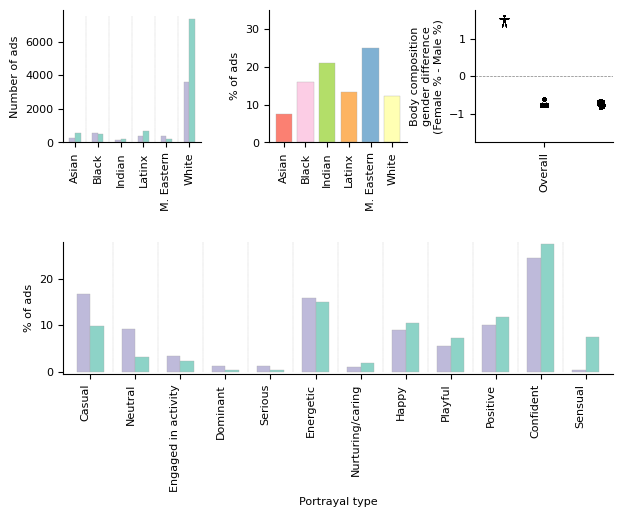

In [18]:
axd = plt.figure(figsize = (18*centimeter, 12*centimeter)).subplot_mosaic(
    """
    ADE
    FFF
    """
)


plot_count_ads(representation, axd['A'])
plot_emotions(emotion_race, axd['D'])
plot_body_parts(body, axd['E'])
plot_clusters(pivot_clean, axd['F'])


sns.despine()

for letter in ['A', 'D', 'E', 'F']:
    axd[letter].tick_params(axis='both', which='major', labelsize=8)

plt.subplots_adjust(wspace = 0.5, hspace = 0.75)
# plt.savefig('../figures/ads_v2.pdf', dpi = 300, bbox_inches = 'tight')